<a href="https://colab.research.google.com/github/Akashpandey1507/Interview-Preparation/blob/main/Pyspark_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pyspark

In [20]:
file = r"/content/drive/MyDrive/Data Analysis Files/SampleSuperstore.csv"

In [21]:
from pyspark.sql import SparkSession
import pyspark

# Create a SparkSession
spark = SparkSession.builder \
    .appName("MySparkApp") \
    .config("spark.some.config.option", "config-value") \
    .getOrCreate()

# Now you can use the 'spark' object to work with Spark APIs.


In [24]:
df = spark.read.csv(file, header=True, inferSchema=True)


In [23]:
pdf = df.cache()
pdf.show()

+--------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+------------+--------+--------+--------+--------+
|     Ship Mode|    Segment|      Country|           City|         State|Postal Code| Region|       Category|Sub-Category|   Sales|Quantity|Discount|  Profit|
+--------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+------------+--------+--------+--------+--------+
|  Second Class|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|      Furniture|   Bookcases|  261.96|       2|     0.0| 41.9136|
|  Second Class|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|      Furniture|      Chairs|  731.94|       3|     0.0| 219.582|
|  Second Class|  Corporate|United States|    Los Angeles|    California|      90036|   West|Office Supplies|      Labels|   14.62|       2|     0.0|  6.8714|
|Standard Class|   Consumer|United States|Fort

In [26]:
df.count()

9994

In [27]:
len(df.columns)

13

In [28]:
df.columns

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [29]:
from pyspark.sql import functions as f
from pyspark.sql import types as t

In [30]:
df.select([f.sum(f.col(i).isNull().cast('int')).alias(i) for i in df.columns]).show()

+---------+-------+-------+----+-----+-----------+------+--------+------------+-----+--------+--------+------+
|Ship Mode|Segment|Country|City|State|Postal Code|Region|Category|Sub-Category|Sales|Quantity|Discount|Profit|
+---------+-------+-------+----+-----+-----------+------+--------+------------+-----+--------+--------+------+
|        0|      0|      0|   0|    0|          0|     0|       0|           0|    0|       0|       0|     0|
+---------+-------+-------+----+-----+-----------+------+--------+------------+-----+--------+--------+------+



In [31]:
df.printSchema()

root
 |-- Ship Mode: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Region: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Sub-Category: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)



In [40]:
df.select(f.sum(f.col("Profit")).alias('Net profit')).show()

+-----------------+
|       Net profit|
+-----------------+
|286397.0217000013|
+-----------------+



In [38]:
df.select(f.sum(f.col("Discount")).alias('Net Discount')).show()

+------------------+
|      Net Discount|
+------------------+
|1561.0900000000954|
+------------------+



In [41]:
df.select(f.sum(f.col("Sales")).alias('Net Sales')).show()

+-----------------+
|        Net Sales|
+-----------------+
|2297200.860299955|
+-----------------+



In [42]:
df.select(f.sum(f.col("Quantity")).alias('Net Unites')).show()

+----------+
|Net Unites|
+----------+
|     37873|
+----------+



In [45]:
top_10_city = df.groupBy("City").agg(f.sum("Profit").alias("net profit")).orderBy("net profit", ascending=False).limit(10)
top_10_city.show()

+-------------+------------------+
|         City|        net profit|
+-------------+------------------+
|New York City| 62036.98369999999|
|  Los Angeles| 30440.75789999997|
|      Seattle|        29156.0967|
|San Francisco|17507.385399999985|
|      Detroit|13181.790800000002|
|    Lafayette|        10018.3876|
|      Jackson|7581.6828000000005|
|      Atlanta|         6993.6629|
|  Minneapolis| 6824.584599999999|
|    San Diego| 6377.196000000003|
+-------------+------------------+



In [46]:
city = top_10_city.select(top_10_city.columns).collect()
city

[Row(City='New York City', net profit=62036.98369999999),
 Row(City='Los Angeles', net profit=30440.75789999997),
 Row(City='Seattle', net profit=29156.0967),
 Row(City='San Francisco', net profit=17507.385399999985),
 Row(City='Detroit', net profit=13181.790800000002),
 Row(City='Lafayette', net profit=10018.3876),
 Row(City='Jackson', net profit=7581.6828000000005),
 Row(City='Atlanta', net profit=6993.6629),
 Row(City='Minneapolis', net profit=6824.584599999999),
 Row(City='San Diego', net profit=6377.196000000003)]

In [48]:
city_x = [i["City"] for i in city]
city_y = [i["net profit"] for i in city]

In [49]:
city_x


['New York City',
 'Los Angeles',
 'Seattle',
 'San Francisco',
 'Detroit',
 'Lafayette',
 'Jackson',
 'Atlanta',
 'Minneapolis',
 'San Diego']

In [50]:
city_y

[62036.98369999999,
 30440.75789999997,
 29156.0967,
 17507.385399999985,
 13181.790800000002,
 10018.3876,
 7581.6828000000005,
 6993.6629,
 6824.584599999999,
 6377.196000000003]

In [51]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

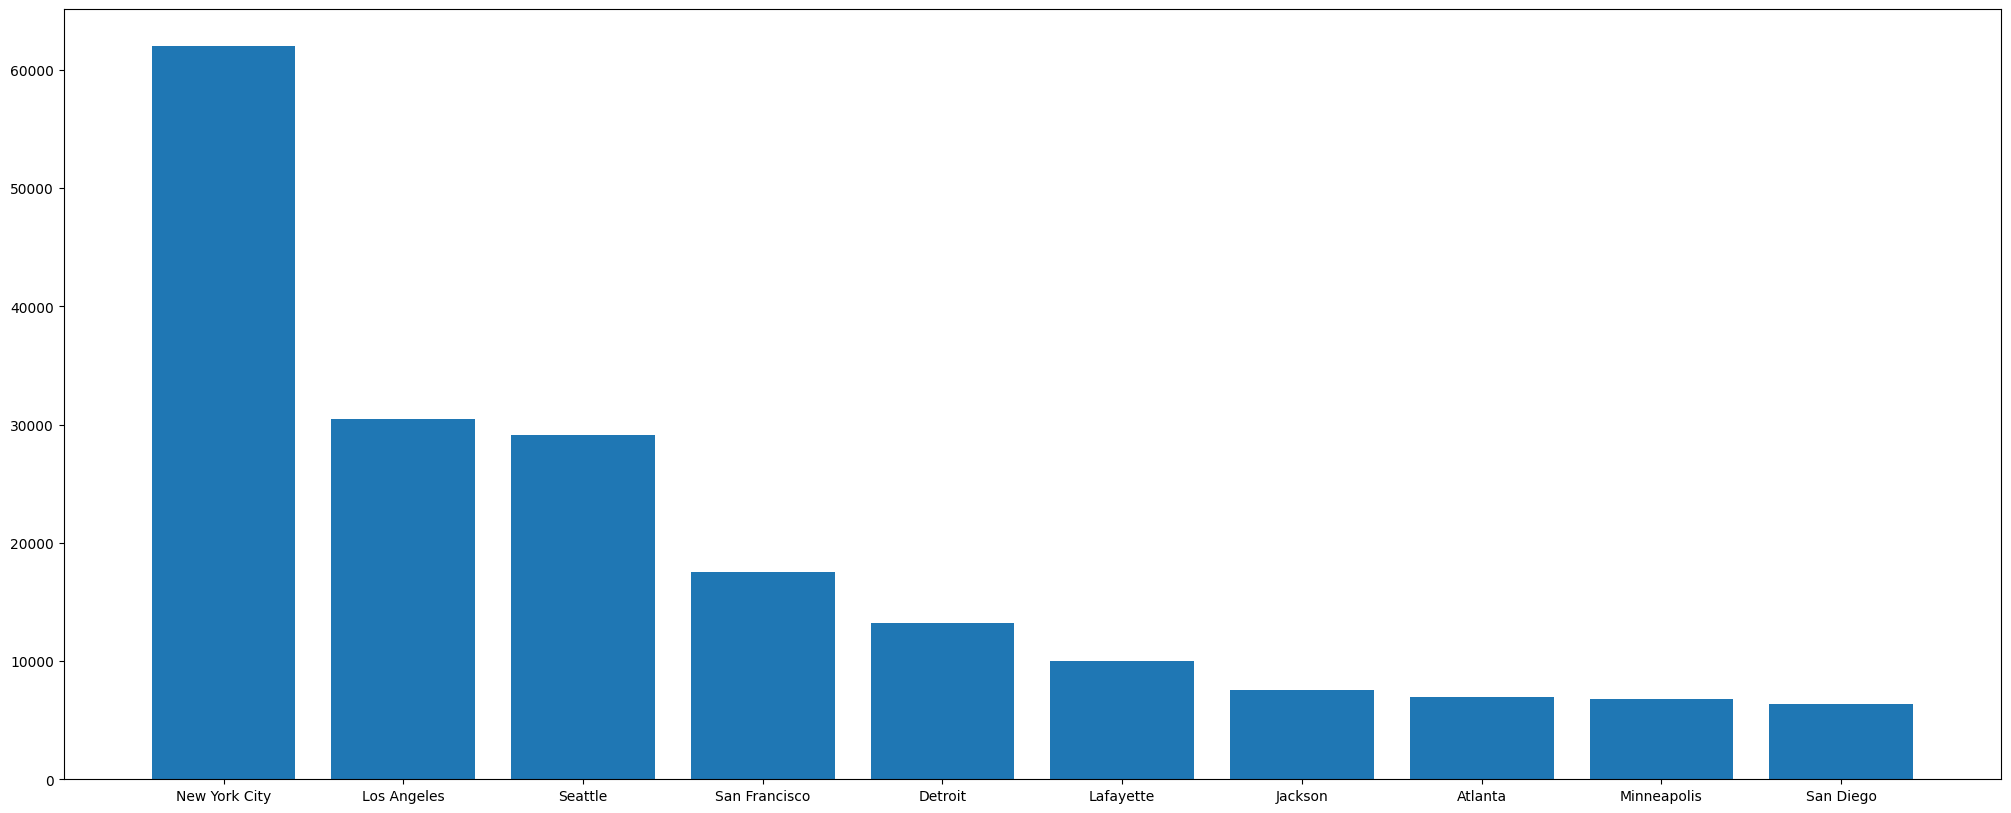

In [53]:
plt.figure(figsize=(25,10))

plt.bar(city_x,city_y)

In [54]:
bot_10_city = df.groupBy("City").agg(f.sum("Profit").alias("net profit")).orderBy("net profit").limit(10)
bot_10_city.show()

+------------+-------------------+
|        City|         net profit|
+------------+-------------------+
|Philadelphia|-13837.767400000012|
|     Houston|-10153.548499999997|
| San Antonio|         -7299.0502|
|   Lancaster| -7239.068400000001|
|     Chicago| -6654.568799999997|
|  Burlington|-3622.8772000000013|
|      Dallas|-2846.5257000000006|
|     Phoenix| -2790.883200000001|
|      Aurora|         -2691.7386|
|Jacksonville|-2323.8349999999996|
+------------+-------------------+



In [55]:
city1 = bot_10_city.select(bot_10_city.columns).collect()
city1

[Row(City='Philadelphia', net profit=-13837.767400000012),
 Row(City='Houston', net profit=-10153.548499999997),
 Row(City='San Antonio', net profit=-7299.0502),
 Row(City='Lancaster', net profit=-7239.068400000001),
 Row(City='Chicago', net profit=-6654.568799999997),
 Row(City='Burlington', net profit=-3622.8772000000013),
 Row(City='Dallas', net profit=-2846.5257000000006),
 Row(City='Phoenix', net profit=-2790.883200000001),
 Row(City='Aurora', net profit=-2691.7386),
 Row(City='Jacksonville', net profit=-2323.8349999999996)]

In [56]:
city1_x = [i["City"] for i in city1]
city1_y = [i["net profit"] for i in city1]

In [57]:
city1_x

['Philadelphia',
 'Houston',
 'San Antonio',
 'Lancaster',
 'Chicago',
 'Burlington',
 'Dallas',
 'Phoenix',
 'Aurora',
 'Jacksonville']

In [58]:
city1_y

[-13837.767400000012,
 -10153.548499999997,
 -7299.0502,
 -7239.068400000001,
 -6654.568799999997,
 -3622.8772000000013,
 -2846.5257000000006,
 -2790.883200000001,
 -2691.7386,
 -2323.8349999999996]

<BarContainer object of 10 artists>

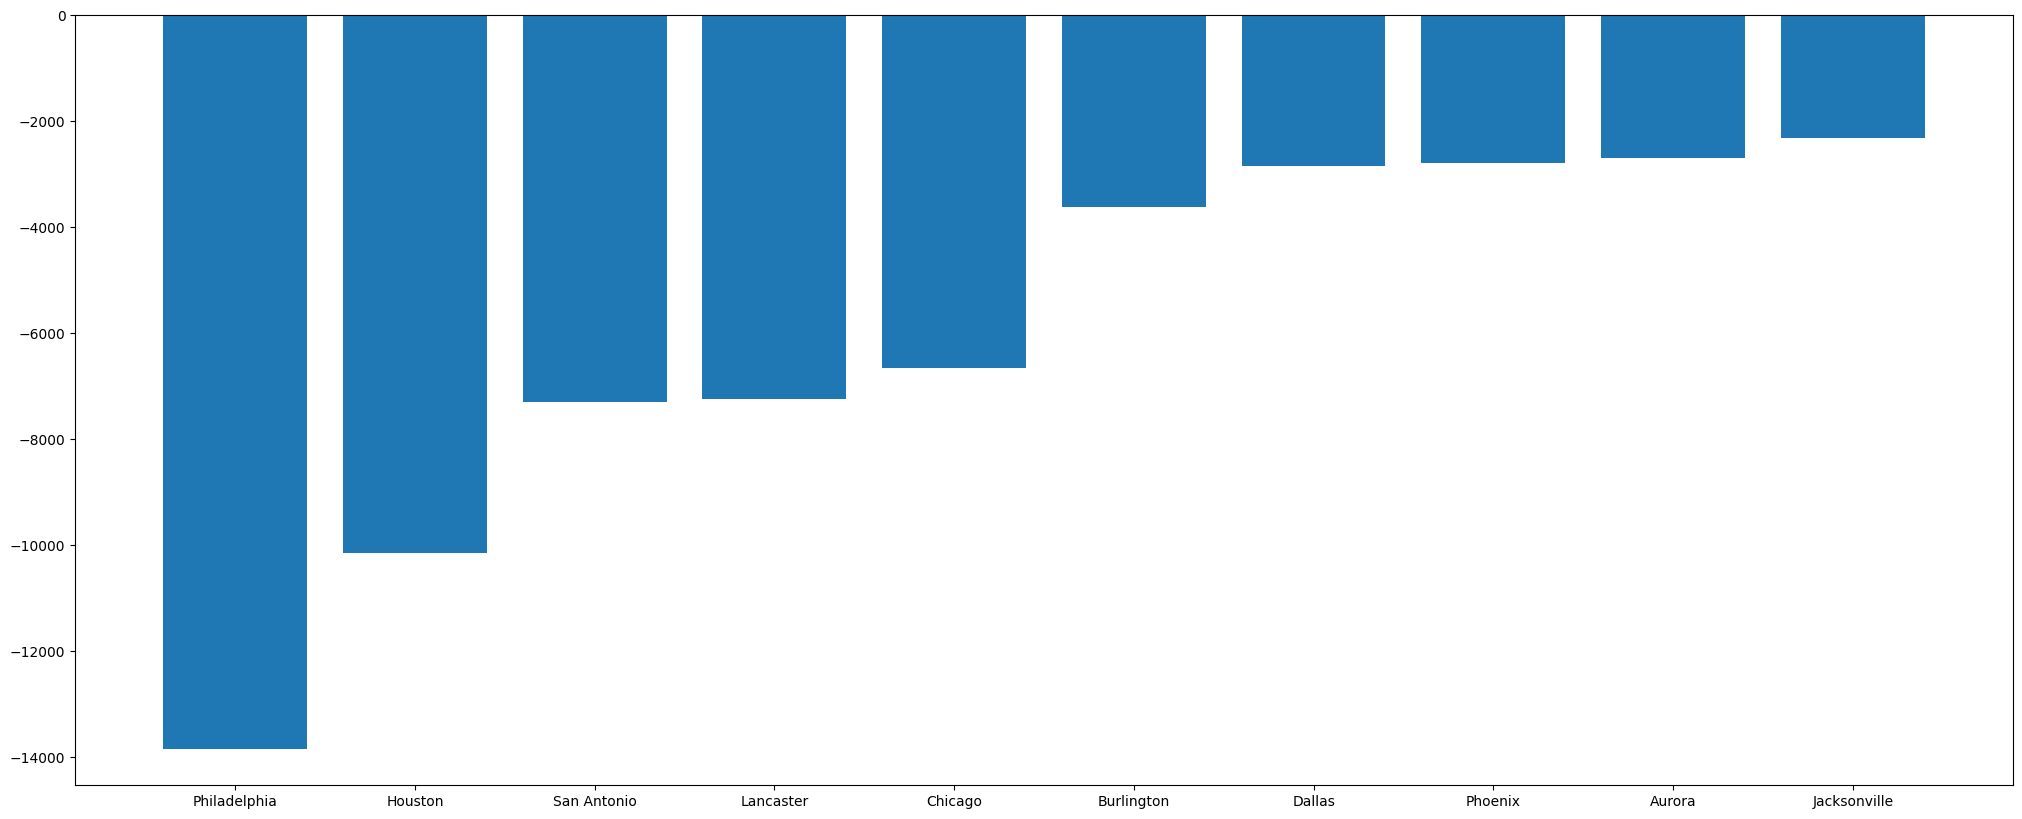

In [59]:
plt.figure(figsize=(25,10))

plt.bar(city1_x,city1_y)

In [32]:
pdf.show()

+--------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+------------+--------+--------+--------+--------+
|     Ship Mode|    Segment|      Country|           City|         State|Postal Code| Region|       Category|Sub-Category|   Sales|Quantity|Discount|  Profit|
+--------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+------------+--------+--------+--------+--------+
|  Second Class|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|      Furniture|   Bookcases|  261.96|       2|     0.0| 41.9136|
|  Second Class|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|      Furniture|      Chairs|  731.94|       3|     0.0| 219.582|
|  Second Class|  Corporate|United States|    Los Angeles|    California|      90036|   West|Office Supplies|      Labels|   14.62|       2|     0.0|  6.8714|
|Standard Class|   Consumer|United States|Fort